In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

#libraries for linear regrssion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

register_matplotlib_converters()


In [2]:
#reading data from csv file, making date as index
df = pd.read_csv('Historical Product Demand.csv', parse_dates = ['Date'], index_col = ['Date'])

#converting Order_Demand as int
df['Order_Demand']=df['Order_Demand'].astype(int)


In [3]:
display(df)

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500
...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000
2016-04-27,Product_1974,Whse_J,Category_006,1
2016-04-28,Product_1787,Whse_J,Category_006,2500


The above dateset contains the Product code of different product, category and orders demand, shipped from which warehouse and on which date.

In [4]:
display(df.describe())

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2012-07-27 to 2016-06-27
Data columns (total 4 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Order_Demand        1048575 non-null int32
dtypes: int32(1), object(3)
memory usage: 36.0+ MB


None

In [6]:
#Grouping Product by product Code in sorted order
maxOrder = df.groupby(df['Product_Code']).sum().sort_values(by='Order_Demand', ascending=False)

display(maxOrder)

,Order_Demand
Product_Code,
Product_1359,472474000
Product_1248,289117000
Product_0083,210651000
Product_1341,169777000
Product_1295,123303000
...,...
Product_0638,22
Product_0853,20
Product_0465,3


Now, when I have group the dataset according to the the product code. I'm going to find out which product has more demand.

In [7]:
#Takinng  Maximum Order_Demand of the Product
#Here Product_Code of Maximum Order_Demand can get by maxOrder.index[0]
print(maxOrder.index[0], 'has maximum number of Order Demand')
max_df = df[df['Product_Code'] == maxOrder.index[0]]
display(max_df)

Product_1359 has maximum number of Order Demand


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-04-18,Product_1359,Whse_J,Category_019,80000
2012-05-21,Product_1359,Whse_J,Category_019,70000
2012-06-26,Product_1359,Whse_J,Category_019,80000
2012-07-17,Product_1359,Whse_J,Category_019,100000
2012-08-24,Product_1359,Whse_J,Category_019,100000
...,...,...,...,...
2016-10-03,Product_1359,Whse_J,Category_019,20000
2016-09-16,Product_1359,Whse_J,Category_019,10000
2016-11-01,Product_1359,Whse_J,Category_019,30000


Now, we can check that, Prduct_1359 has more demand.

Now I'm going to find out total number of orders demanded each month.

In [8]:
# All orders from Warehouse
orders = max_df.filter(['Date','Order_Demand'], axis=1)

#Group Order_Demand by months
orders = orders.groupby(pd.Grouper(freq='M')).sum().dropna()

display(orders)


,Order_Demand
Date,
2012-01-31,8911000
2012-02-29,8131000
2012-03-31,7775000
2012-04-30,8960000
2012-05-31,8475000
...,...
2016-09-30,6960000
2016-10-31,7727000
2016-11-30,8814000


Now, I'm going to plot the line graph on the above dataset.

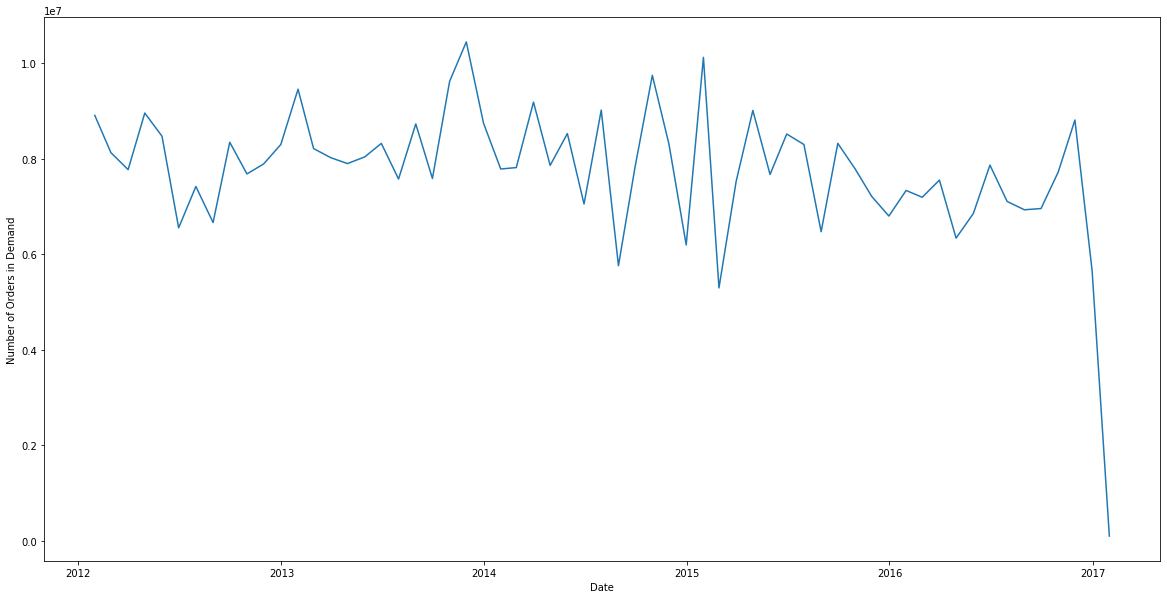

In [9]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Number of Orders in Demand')
plt.plot(orders)

Now, when we have the dataset of product_1359 order demands of each month. 

---
Then I'm going to apply linear regression on the dataset to because it is very powerful technique and can be used to understand the factors that influence profitability. It can be used to forecast sales in the coming months by analyzing the sales data for previous months.

Slope: [-1001.64569404]
Intercept: 2468658559.316585
Root mean squared error:  1765164822769.5066
R2 score:  0.14034003551822027


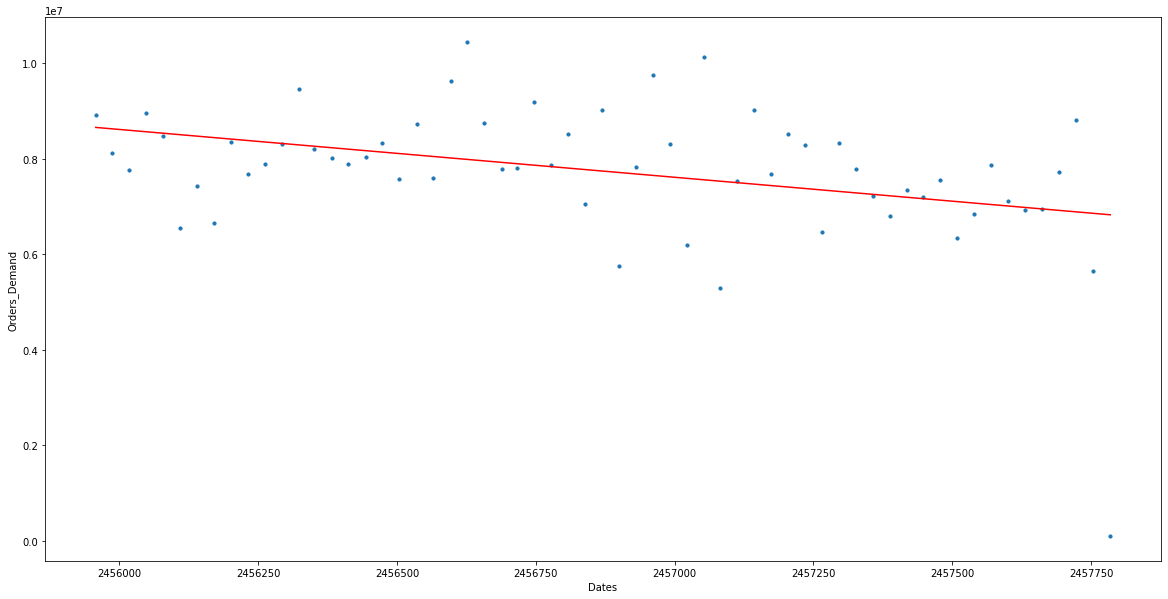

In [10]:
'''
Linear Regeression
'''

# observations 
xaxis = orders.index.to_julian_date().values
y = orders.Order_Demand.values

x = [[i] for i in xaxis]

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.figure(figsize=(20,10))
# data points
plt.scatter(x, y, s=10)
plt.xlabel('Dates')
plt.ylabel('Orders_Demand')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

Now, when we applied Linear Regression in our dataset, it is clear that the sales is going gradually down. 
It means in future the demand of the product going to less.

---
To confirm the forecasting I'm going to apply another nmethod i.e ARIMA on the same dataset using Rolling Statistics and Standard Deviation.

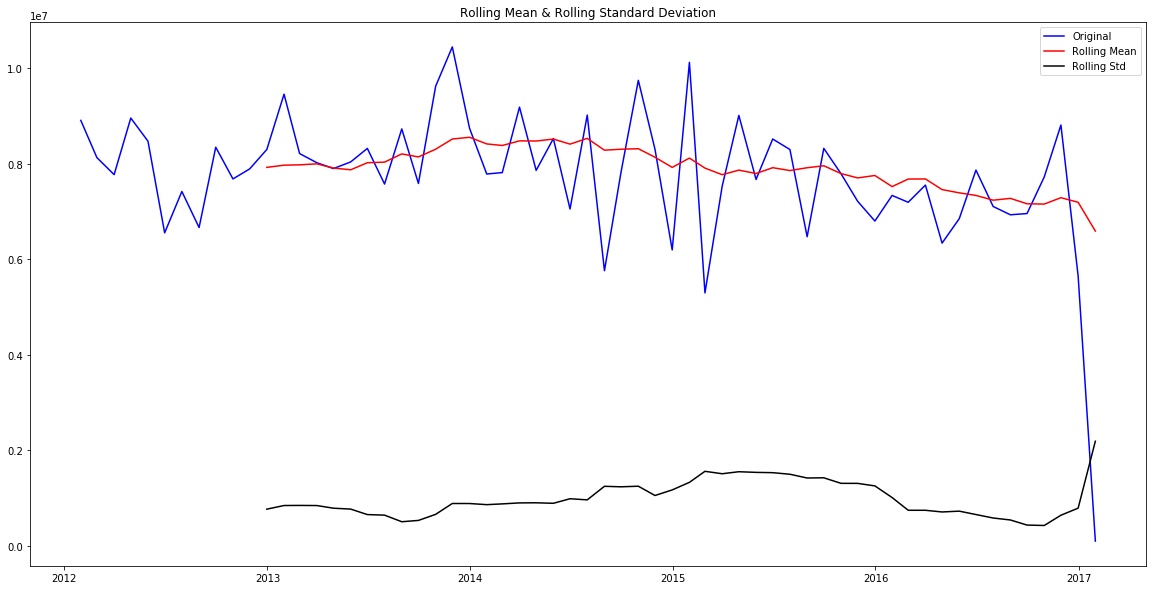

In [11]:
'''
Rolling Statistics: Plot the rolling mean and rolling standard deviation. 
                    The time series is stationary if they remain constant with time 
                    (with the naked eye look to see if the lines are straight and parallel to the x-axis).

Augmented Dickey-Fuller Test: 
                    The time series is considered stationary if the p-value is low 
                    (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals 
                    are as close as possible to the ADF Statistics

'''
#Rolling mean of Order_Demand
rolling_mean = orders.rolling(window = 12).mean()

#Standard Deviation of Order_Demand
rolling_std = orders.rolling(window = 12).std()

plt.figure(figsize=(20,10))
plt.plot(orders, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

As you can see, the rolling mean and rolling standard deviation decrease with time. Therefore, we can conclude that the time series is not stationary.

In [12]:
'''
As you can see, the rolling mean and rolling standard deviation is not constant with time. 
Therefore, we can conclude that the time series is not stationary.
'''

result = adfuller(orders['Order_Demand'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.44188271401983
p-value: 0.0002500697566330683
Critical Values:
	1%: -3.5443688564814813
	5%: -2.9110731481481484
	10%: -2.5931902777777776


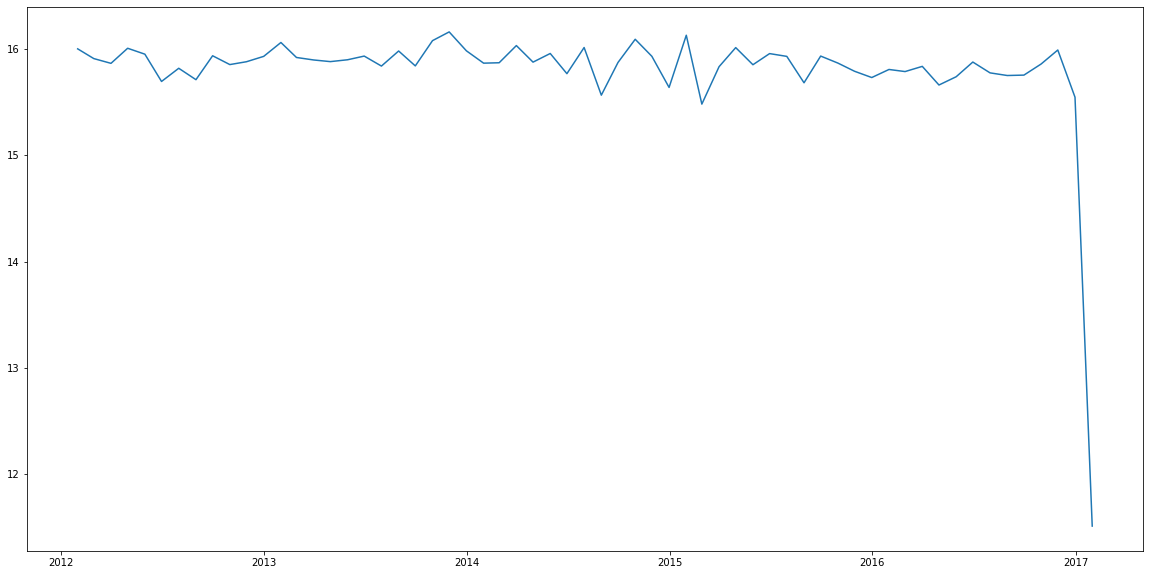

In [13]:
'''
Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.
'''

df_log = np.log(orders)
plt.figure(figsize=(20,10))
plt.plot(df_log)


As we have some gaps in our dataset which can cause problems in next steps.

To ignore that, I'm going to take subset from dataset having continuous data.

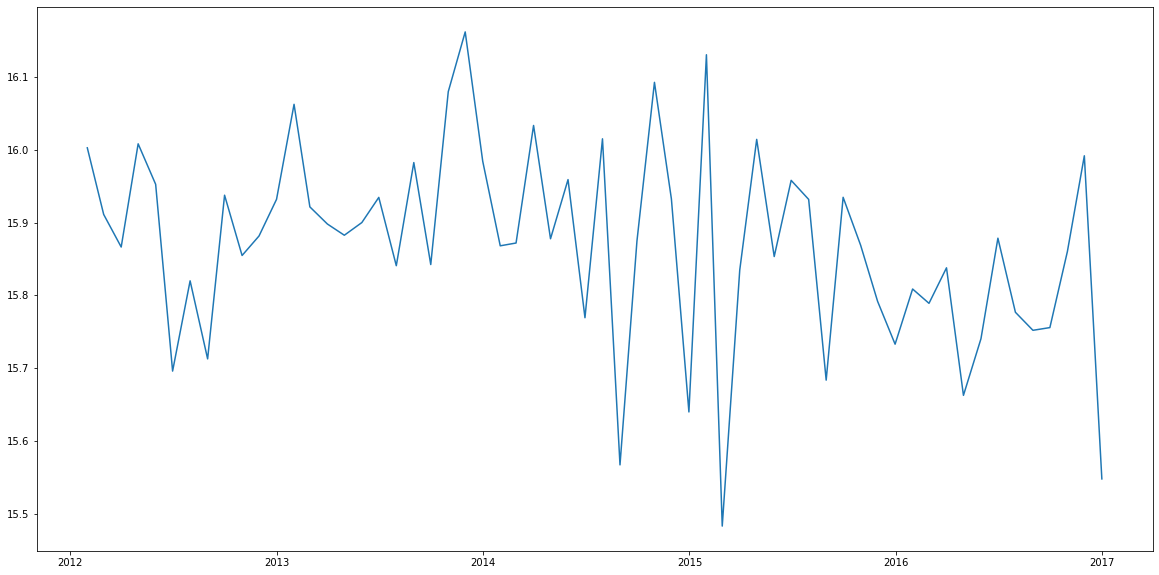

In [14]:
'''
Taking data between 2012 and 2016 dates
'''

orders = orders.loc['2012-01-01' : '2016-12-31']

df_log = np.log(orders)

plt.figure(figsize=(20,10))
plt.plot(df_log)


In [15]:
'''
We can create and fit an ARIMA model with AR of order 2, differencing of order 1 and MA of order 2.
'''
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)


Now, the prediction model has been created using the existing data. I'm going to plot a graph having original dataset, comparing with the prediction model.

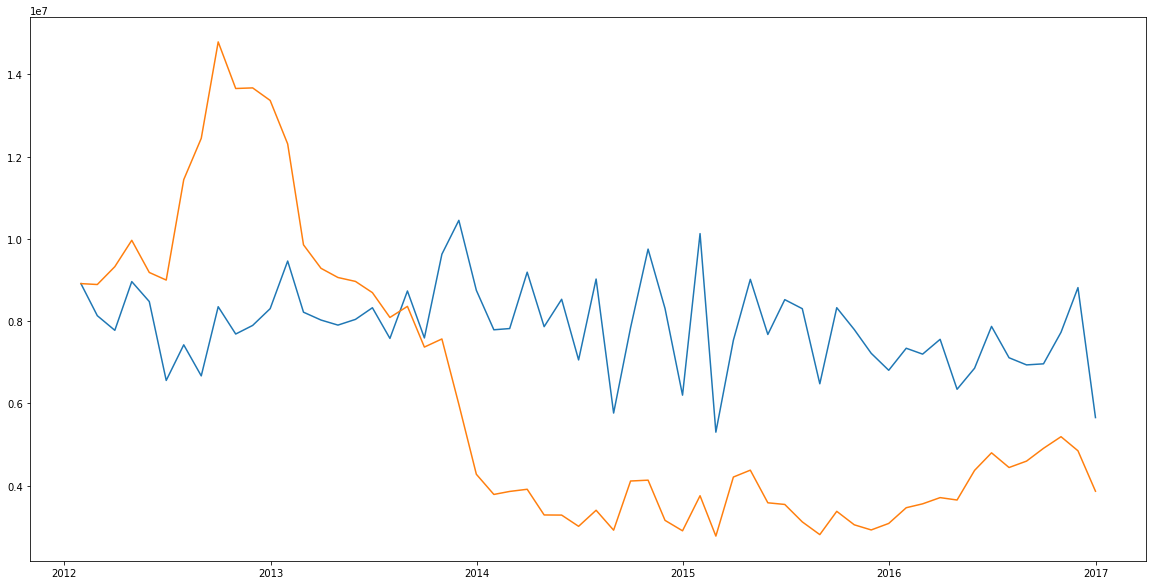

In [16]:
#Then, we can see how the model compares to the original time series.
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Order_Demand'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(20,10))
plt.plot(orders)
plt.plot(predictions_ARIMA)

After that, I'm going to forecast the data for next five years along with previous five years data.

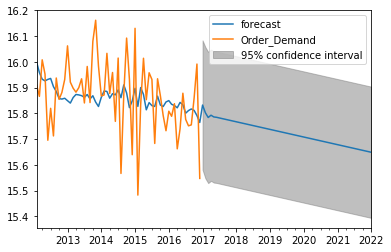

In [17]:
#Predicting next Five year result
'''
Given that we have data going for every month going back 5 years 
and want to forecast the number of passengers for the next 5 years, 

        previous    next
we use (5 x 12) + (5 x 12) = 120.
'''

plt = results.plot_predict(1,120)


### Conclusion:
* We have learnt about the concepts of linear regression and gradient descent. 
* We implemented the model using scikit-learn library as well.
* For above Product_1359 Order Demand will get decrease in next five years. 
* This conculsion are getting in both linear regression and ARIMA-model.

### Summary of what I did in this Project.

---

* After reading all data from CSV, making Date column as index and Order_Demand as int.
* Sorting product code by Order Demand, and taking Product Code which has largest number of Order Demand.
* Taking sum of Order demand monthwise and plotting graph.
* using sklearn.linear_model for LinearRegression and plotting Linear Regression Graph.
* In next step, we are calculating the rolling mean and rolling standard deviation to check whether data is constant 
*    with time or not and plotting graph.
* Using adfuller method from statsmodels to get result.
* Taking the log of the dependent variable.
* Creating and fitting an ARIMA model with AR of order 2, differencing of order 1 and MA of order 2.
* Comparing model to the original time series.
* Forecasting the data for next Five years.
* I shouold give the approx percenatge chnage of the result.
